In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [70]:
import pandas as pd
file_path = 'housing.csv'
data = pd.read_csv(file_path)

In [71]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [72]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 506 rows and 14 columns



 [01]  **CRIM** 자치시(town) 별 1인당 범죄율

 [02]  **ZN** 25,000 평방피트를 초과하는 거주지역의 비율 

 [03]  **INDUS** 비소매상업지역이 점유하고 있는 토지의 비율 

 [04]  **CHAS** 찰스강의 경계에 위치한 경우는 1, 아니면 0

 [05]  **NOX**  10ppm 당 농축 일산화질소 

 [06]  **RM** 주택 1가구당 평균 방의 개수 

 [07]  **AGE** 1940년 이전에 건축된 소유주택의 비율 

 [08]  **DIS** 5개의 보스턴 직업센터까지의 접근성 지수 

 [09]  **RAD** 방사형 도로까지의 접근성 지수 

 [10]  **TAX** 10,000 달러 당 재산세율 

 [11]  **PTRATIO**자치시(town)별 학생/교사 비율

 [12]  **B** 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함. 

 [13]  **LSTAT** 모집단의 하위계층의 비율(%)

 [14] ** MEDV** 본인 소유의 주택가격(중앙값) (단위: $1,000)


<Axes: >

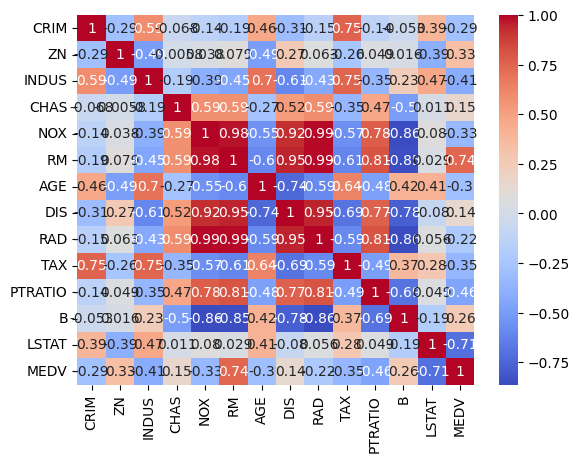

In [73]:
import seaborn as sns
# Compute the correlation matrix
corr = data.corr()
# Plot the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

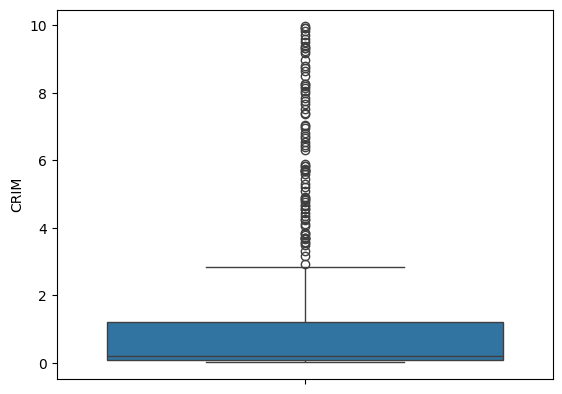

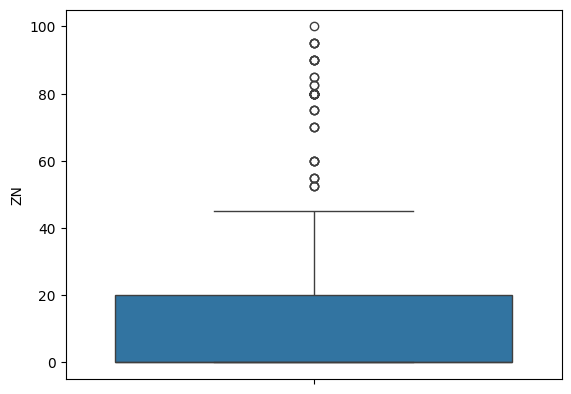

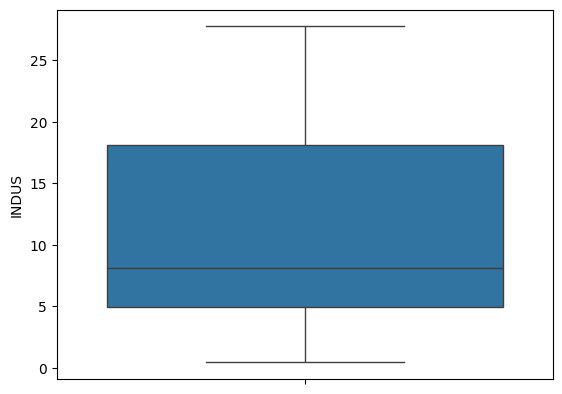

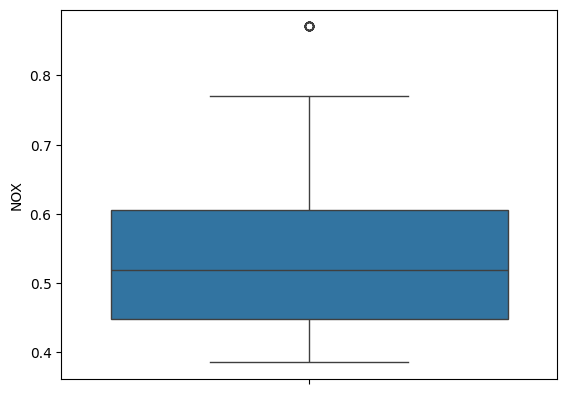

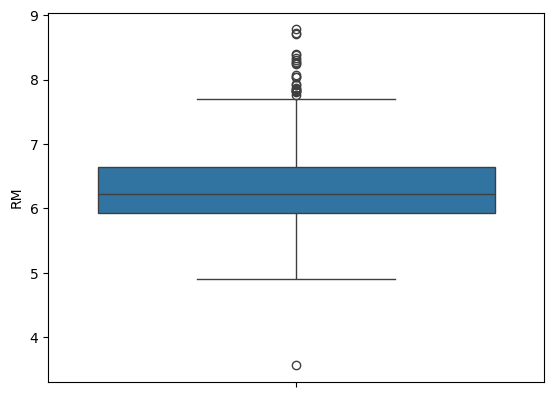

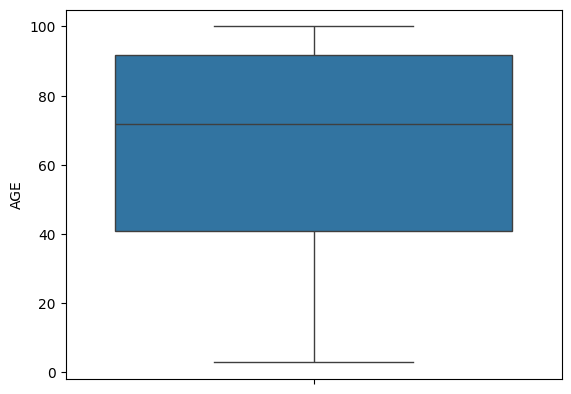

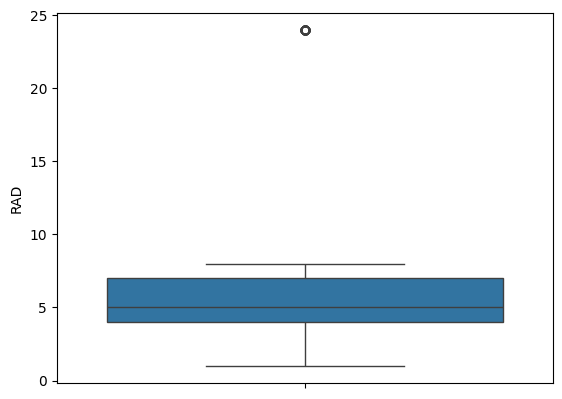

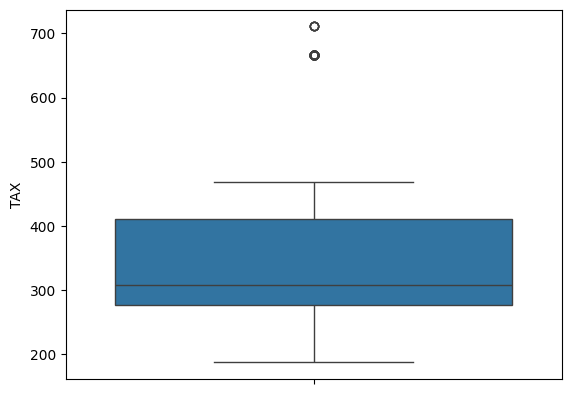

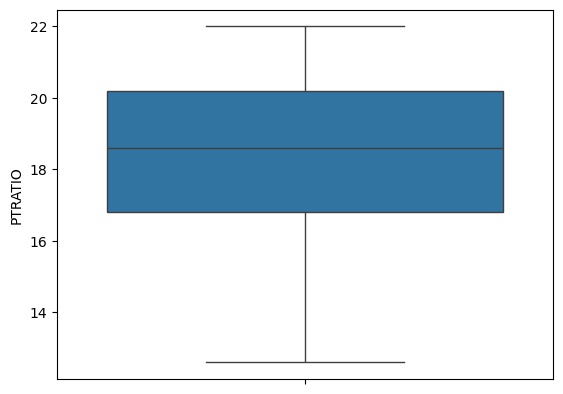

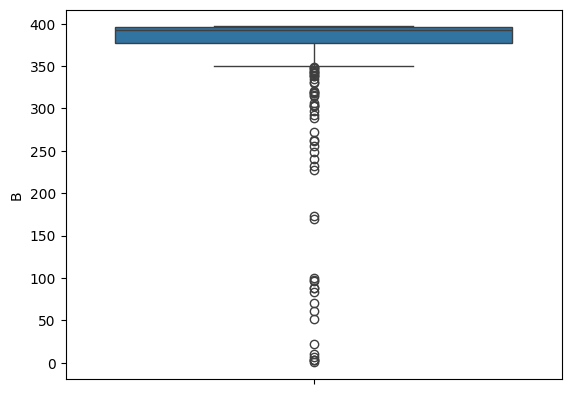

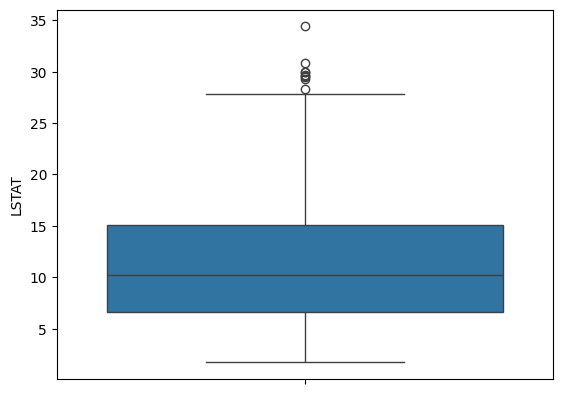

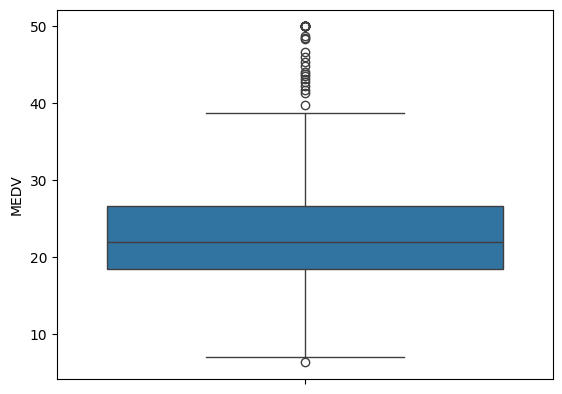

<Axes: >

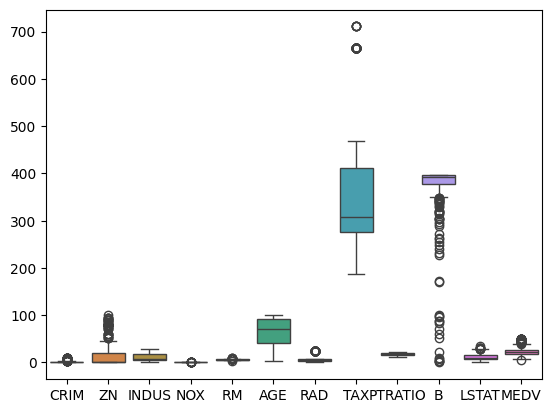

In [144]:
for col in data.columns:
    sns.boxplot(data[col])
    plt.show()
sns.boxplot(data)

In [75]:
# remove missing values
data = data.dropna()

In [76]:
# drop CHAS and DIS
data = data.drop(['CHAS', 'DIS'], axis=1)

In [77]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [80]:
from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [81]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

In [164]:
torch.manual_seed(0)
model = LinearRegression(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-6)

# training
n_epochs = 7
for epoch in range(n_epochs):
    model.train()
    for X, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
    print(f'epoch: {epoch}, loss: {loss.item()}')

epoch: 0, loss: 251.2664031982422
epoch: 1, loss: 160.32667541503906
epoch: 2, loss: 70.4012451171875
epoch: 3, loss: 179.87806701660156
epoch: 4, loss: 152.31765747070312
epoch: 5, loss: 89.87578582763672
epoch: 6, loss: 29.44866371154785


In [165]:
# testing
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    loss = criterion(y_pred, y_test)
    print(f'test loss: {loss.item()}')

test loss: 96.31204986572266
